<a href="https://colab.research.google.com/github/iuri/bci/blob/main/S001R01_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# To install mne library
!pip install mne

In [1]:
# To upload EDF file
from google.colab import files
files.upload()

Saving S001R01.edf to S001R01.edf


{'S001R01.edf': b'0       X X X X                                                                         Startdate 12-AUG-2009 X X BCI2000                                               12.08.0916.15.0016896   EDF+C                                       61      1       65  Fc5.            Fc3.            Fc1.            Fcz.            Fc2.            Fc4.            Fc6.            C5..            C3..            C1..            Cz..            C2..            C4..            C6..            Cp5.            Cp3.            Cp1.            Cpz.            Cp2.            Cp4.            Cp6.            Fp1.            Fpz.            Fp2.            Af7.            Af3.            Afz.            Af4.            Af8.            F7..            F5..            F3..            F1..            Fz..            F2..            F4..            F6..            F8..            Ft7.            Ft8.            T7..            T8..            T9..            T10.            Tp7.            Tp8.  

In [20]:
# To read EDF 
import mne 
rawEEG = mne.io.read_raw_edf('S001R01.edf', preload=True)

Extracting EDF parameters from /content/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...


In [12]:
# File description
rawEEG

<RawEDF | S001R01.edf, 64 x 9760 (61.0 s), ~65 kB, data not loaded>

In [16]:
xraw = rawEEG.get_data()
# Number of channels
xraw.shape

(64, 9760)

Effective window size : 12.800 (s)


<ipython-input-9-1ca768ac3b9d>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  rawEEG.plot_psd()


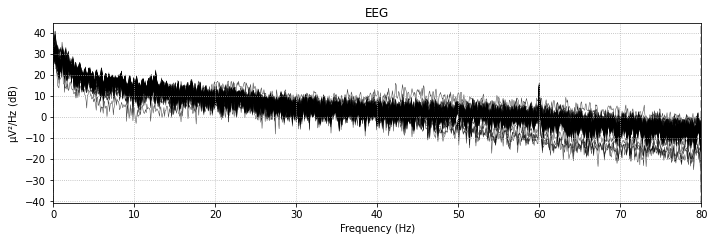

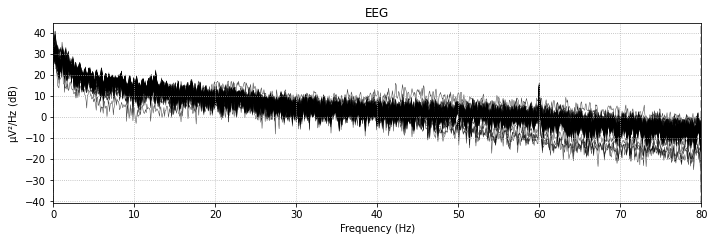

In [9]:
# Plot Potential Spectrum Density
rawEEG.plot_psd()

Using matplotlib as 2D backend.
Opening raw-browser...


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


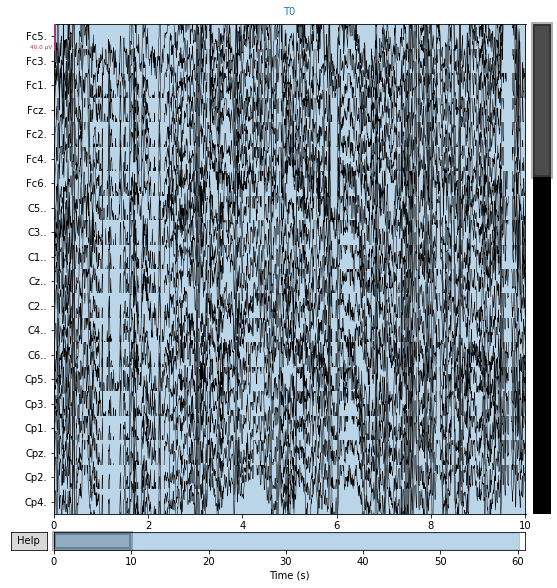

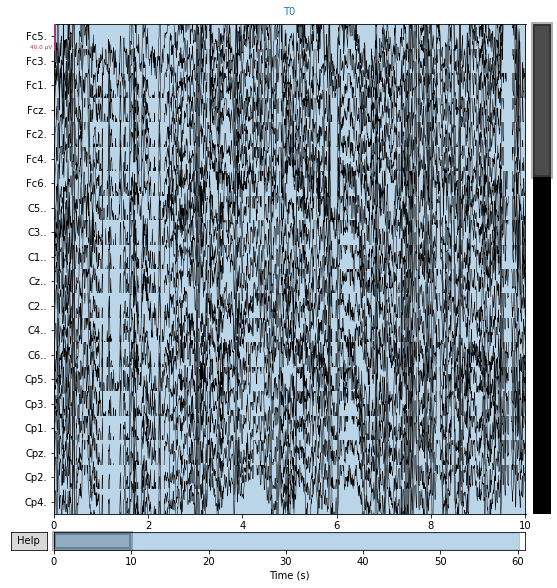

In [10]:
# Plot eeg data 
rawEEG.plot()

In [17]:
# Existem muitos artefatos EOG nos sinais EEG. 
# Vamos utilizar ICA (Independente Component Analisis) para corrigir os sinais e elminar ruido e sinais EEG validos
# 
 ica = mne.preprocessing.ICA(n_components=20, random_state=0)

In [21]:
ica.fit(rawEEG.copy().filter(8,30))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 sec)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 1.5s.


<ICA | raw data decomposition, method: fastica (fit in 59 iterations on 9760 samples), 20 ICA components explaining 98.5 % of variance (64 PCA components available), channel types: eeg, no sources marked for exclusion>

In [25]:
montage = mne.channels.read_montage(kind='filename', ch_names=None, path='datapath', unit='m', transform=False)
print(montage)

rawEEG.set_montage(montage, set_dig=True)

AttributeError: ignored

In [24]:
ica.plot_components(outlines="skirt")

RuntimeError: ignored

In [27]:
# events = mne.find_events(rawEEG)
events = mne.events_from_annotations(rawEEG)

Used Annotations descriptions: ['T0']
